# **Getting Started with NETS**

**NETS** is a vanilla Deep Learning framework, made using only **NumPy**.
This project was first introduced as an assignment I made at the [University of Oslo](https://www.uio.no/studier/emner/matnat/ifi/IN5400/) and [Stanford University](http://cs231n.stanford.edu/syllabus.html)
.
However, this project was recreated to make it *object-oriented like*.
**NETS** was highly inspired from [PyTorch](https://pytorch.org/) and [TensorFlow](https://www.tensorflow.org/)

Requirements :

- Numpy
- Json (Optional)
- Time (Optional)
- Pandas (Optional)
- Scipy (Optional)
- Scikit-Learn (Optional)

In [1]:
import os
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# Configure the style of a plot
matplotlib.style.use('seaborn-darkgrid')
# Change the font ?
# font = {'size'   : 15}
# matplotlib.rc('font', **font)

In [2]:
import nets
import nets.nn as nn

model = nn.Sequential(nn.Linear(3, 10), 
                      nn.ReLU(),
                      nn.Linear(10, 2))

In [3]:
X = (np.random.rand(100, 3) * 2 - 1) / 2

In [4]:
print(f"Sanity check:")
print(f"Expected mean: 0, real mean: {X.sum(axis=1).mean():1.4f}")

Sanity check:
Expected mean: 0, real mean: -0.0185


In [5]:
Y = model(X)

In [6]:
for value in model.modules():
    print(value)

In [7]:
for cache in model.cache():
    print(len(cache))

1
1
1


In [8]:
for grad in model.gradients():
    print(grad)

{}
{}
{}


In [9]:
layer = model._modules['linear0']
layer._grads

{}

In [1]:
from nets.tensor import Tensor
from nets.nn import Module
from nets.nn.loss import Loss, MSE
from nets.optim import Optimizer, SGD
from nets.data.batch import BatchIterator


def train(net, inputs, targets, optimizer, loss,
          num_epochs = 5000, iterator = BatchIterator()):
    epochs = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for batch in iterator(inputs, targets):
            predicted = net.forward(batch.inputs)
            epoch_loss += loss.loss(predicted, batch.targets)
            grad = loss.grad(predicted, batch.targets)
            net.backward(grad)
            optimizer.step()
            epochs.append(epoch_loss)
        print(f"\r{epoch}, {epoch_loss:E}", end="")
    return epochs

In [4]:
import numpy as np

import nets.nn as nn
from nets.nn import Sequential
from nets.nn import Linear, ReLU, Tanh

inputs = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]])

targets = np.array([[1, 0],
                    [0, 1],
                    [0, 1],
                    [1, 0]])

net = nn.Sequential(
                    Linear(2, 100),
                    Tanh(),
                    Linear(100, 2)
                )


loss = MSE()
optimizer = SGD(net, lr=0.1)
epochs = train(net, inputs, targets, optimizer, loss)

# for x, y in zip(inputs, targets):
#     predicted = net.forward(x)

327, NAN80627E+308

D:\home\Arthur\Documents\Informatique\GitHub\nets\nets\nn\loss.py:72: RuntimeWarning: overflow encountered in square
  return np.sum((predicted - actual) ** 2)


4999, NAN

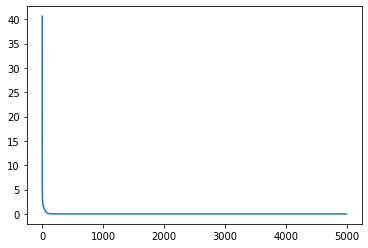

In [3]:
import matplotlib.pyplot as plt

plt.plot(epochs)

In [ ]:
issubclass(Sequential, Module)

In [ ]:
issubclass(Linear, Module)

In [ ]:
Linear

In [ ]:
Module

In [35]:
net = Sequential(Linear(2, 10),
                 Tanh(),
                 Linear(10, 10),
                 Tanh(),
                 Linear(10, 2))

In [11]:
import numpy as np
import inspect

class Tensor2:
    def __init__(self,
                 data,
                 requires_grad = False):
        self._data = np.array(data)
        self.requires_grad = requires_grad
        self.shape = self._data.shape
        self.grad = None

        if self.requires_grad:
            self.zero_grad()

    @property
    def data(self):
        return self._data

    @data.setter
    def data(self, new_data):
        self._data = new_data
        # Setting the data manually means we invalidate the gradient.
        self.grad = None

    def zero_grad(self):
        self.grad = Tensor(np.zeros_like(self.data, dtype=np.float64))

    def __repr__(self):
        return f"Tensor({self.data}, requires_grad={self.requires_grad})"

In [12]:
class Parameter(Tensor2):
    def __init__(self, *shape) -> None:
        data = np.random.randn(*shape)
        super().__init__(data)

class Test:
    def parameters(self):
        for name, value in inspect.getmembers(self):
            if isinstance(value, Parameter):
                print(name, value)
                yield value
            elif isinstance(value, Test):
                yield from value.parameters()

    def zero_grad(self):
        for parameter in self.parameters():
            parameter.zero_grad()
            
            
class Model(Test):
    def __init__(self):
        self.w = Parameter(3)
        self.b = Parameter()

    def predict(self, inputs):
        return inputs @ self.w + self.b

class Model2(Test):
    def __init__(self):
        self.model = Model()

    def predict(self, inputs):
        return model.predict(inputs)

In [13]:
model = Model()

model2 = Model2()

In [20]:
for i in model2.parameters():
    print(i)

b Tensor(-1.4955670314679403, requires_grad=False)
Tensor(-1.4955670314679403, requires_grad=False)
w Tensor([-0.61692534  0.55558979  0.50912653], requires_grad=False)
Tensor([-0.61692534  0.55558979  0.50912653], requires_grad=False)


In [14]:
model.__dict__

{'w': Tensor([-0.38683286  0.33859879 -1.58316194], requires_grad=False),
 'b': Tensor(-0.45928974445201676, requires_grad=False)}